In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 前処理

In [223]:
def get_train_data() -> pd.DataFrame:
    """Returns a pandas DataFrame with the data"""
   #データセットの読み込み
    TRAIN_DATA_PATH: str = "dataset/train_Mod.csv"
    train_data = pd.read_csv(TRAIN_DATA_PATH)

    #学習データを訓練用、検証用に分割
    train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=0)

    #欠損値の補完（とりあえず平均値で）
    train_data["knee_depth"] = train_data["knee_depth"].fillna(train_data["knee_depth"].mean())
    train_data["hip_depth"] = train_data["hip_depth"].fillna(train_data["hip_depth"].mean())
    
    X_train = train_data.drop("personal_id", axis=1)
    y_train = train_data["personal_id"]
    X_valid = valid_data.drop("personal_id", axis=1)
    y_valid = valid_data["personal_id"]

    return X_train, X_valid, y_train, y_valid


In [224]:
#データセットの読み込み
TRAIN_DATA_PATH: str = "dataset/train_Mod.csv"
TEST_DATA_PATH: str = "dataset/test.csv"
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

train_data.head(5)

id  knee_depth  hip_depth  misalignment  width_of_hand  jump_height  \
0   0    4.114675  20.081082     13.244238     -14.312221    44.388231   
1   1    2.194313  16.056999      3.360566     -13.784517    45.885170   
2   2    6.526472  15.633804      3.355818      -0.642056    41.962244   
3   3    2.307960  17.281763     13.097795      -6.454952    45.614645   
4   4    3.076618  16.892115     10.723250      -6.547873    44.228786   

  personal_id  
0           A  
1           A  
2           A  
3           A  
4           A

In [225]:
#欠損値の確認
train_data.isnull().sum()

id               0
knee_depth       2
hip_depth        4
misalignment     0
width_of_hand    0
jump_height      0
personal_id      0
dtype: int64

In [226]:
#欠損値の補完（とりあえず平均値で）
train_data["knee_depth"] = train_data["knee_depth"].fillna(train_data["knee_depth"].mean())
train_data["hip_depth"] = train_data["hip_depth"].fillna(train_data["hip_depth"].mean())

#idはいらないので削除
train_data = train_data.drop("id", axis=1)
test_data = test_data.drop("id", axis=1)
train_data.isnull().sum()

knee_depth       0
hip_depth        0
misalignment     0
width_of_hand    0
jump_height      0
personal_id      0
dtype: int64

(array([110.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 132.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         80.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.

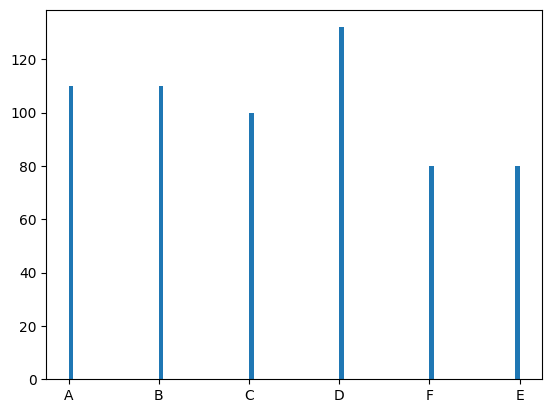

In [227]:
#学習データの偏りを確認する
#出力のpersonal_idをmatplotlibで可視化
plt.hist(train_data["personal_id"], bins=100)

In [228]:
#学習データを訓練用、検証用に分割
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=0)
X_train = train_data.drop("personal_id", axis=1)
y_train = train_data["personal_id"]
X_valid = valid_data.drop("personal_id", axis=1)
y_valid = valid_data["personal_id"]

# ロジスティック回帰による検証

## まずは素で学習させた場合

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#ハイパーパラメータの初期設定
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
#評価指標はaccuracy
model = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)

#最適なパラメータを表示
print("the best param is : ", model.best_params_)
print("the best score is : ", model.best_score_)

#検証データで評価
y_pred = model.predict(X_valid)
print("accuracy : ", accuracy_score(y_valid, y_pred))


the best param is :  {'C': 0.1, 'solver': 'newton-cg'}
the best score is :  0.6830212497370083
accuracy :  0.7560975609756098


In [239]:
#前処理として,標準化してみる
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # ステップ1: 標準化
    ('classifier', LogisticRegression(multi_class='multinomial'))  # ステップ2: ロジスティック回帰
])

#ハイパーパラメータの初期設定
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
#評価指標はaccuracy
model = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)

#最適なパラメータを表示
print("the best param is : ", model.best_params_)
print("the best score is : ", model.best_score_)

#検証データで評価
y_pred = model.predict(X_valid)
print("valid accuracy_score : ", accuracy_score(y_valid, y_pred))

best_logistic = model.best_estimator_


the best param is :  {'C': 0.1, 'solver': 'newton-cg'}
the best score is :  0.6830212497370083
valid accuracy_score :  0.7560975609756098


# 決定木

In [241]:
#単純な決定木
from sklearn.tree import DecisionTreeClassifier

#ハイパーパラメータの初期設定
param = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()), #NOTE:標準化したら少し精度が上がった0.73 -> 0.74
    ('classifier', DecisionTreeClassifier()) 
])

model = GridSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)

#最適なパラメータを表示
print("the best param is : ", model.best_params_)
print("the best score is : ", model.best_score_)
#検証データで評価
y_pred = model.predict(X_valid)
print("valid accuracy_score : ", accuracy_score(y_valid, y_pred))

best_decision_tree = model.best_estimator_

the best param is :  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__splitter': 'best'}
the best score is :  0.7463496738901746
valid accuracy_score :  0.7235772357723578


## XGBoost

In [248]:
#とりあえず、一番精度がでたモデル
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 外れ値の除去
df_ = train_data[train_data['knee_depth'] < 17.5]
df_ = df_[df_['jump_height'] < 80]
df_dropped = df_.dropna()
train_data, valid_data = train_test_split(df_dropped, test_size=0.2, random_state=0)
X_train = train_data.drop("personal_id", axis=1)
y_train = train_data["personal_id"]
X_valid = valid_data.drop("personal_id", axis=1)
y_valid = valid_data["personal_id"]


param = {
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__min_child_weight': [1, 2, 3],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0]
}

pipeline = Pipeline([
    ('classifier', XGBClassifier(eval_metric='mlogloss'))  # ステップ3: XGBoost
])

#yのラベリング
train_y = train_data["personal_id"]
valid_y = valid_data["personal_id"]
# LabelEncoderのインスタンスを作成
label_encoder = LabelEncoder()
# クラスラベルを数値に変換
y_train_encoded = label_encoder.fit_transform(train_y)
y_valid_encoded = label_encoder.fit_transform(valid_y)


model = GridSearchCV(pipeline, param, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train_encoded)

#最適なパラメータを表示
print("the best param is : ", model.best_params_)
print("the best score is : ", model.best_score_)
#検証データで評価
y_pred = model.predict(X_valid)
print("valid accuracy_score : ", accuracy_score(y_valid_encoded, y_pred))

best_xgb = model.best_estimator_

the best param is :  {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.3, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50, 'classifier__subsample': 0.9}
the best score is :  0.7375384615384617
valid accuracy_score :  0.75


c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

## LightGBM

In [246]:
import lightgbm as lgb

# 外れ値の除去
df_ = train_data[train_data['knee_depth'] < 17.5]
df_ = df_[df_['jump_height'] < 80]
df_dropped = df_.dropna()
train_data, valid_data = train_test_split(df_dropped, test_size=0.2, random_state=0)
X_train = train_data.drop("personal_id", axis=1)
y_train = train_data["personal_id"]
X_valid = valid_data.drop("personal_id", axis=1)
y_valid = valid_data["personal_id"]


# LightGBMのモデルを作成
lgbm = lgb.LGBMClassifier(objective='multiclass', num_class=6)

# GridSearchで探索するパラメータの設定
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# GridSearchCVの設定
grid_search = GridSearchCV(lgbm, param_grid, cv=3)

# ハイパーパラメータ探索
grid_search.fit(X_train, y_train)

# 最適なパラメータとその時のスコアを表示
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# 最適なパラメータでモデルを訓練
best_lgbm = grid_search.best_estimator_

# テストデータで評価
y_pred = best_lgbm.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Valid accuracy: {accuracy}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 5
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -1.992430
[LightGBM] [Info] Start training from score -1.624705
[LightGBM] [Info] Start training from score -1.481605
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -1.938363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

# アンサンブル学習

In [249]:
from sklearn.ensemble import VotingClassifier

# 外れ値の除去
df_ = train_data[train_data['knee_depth'] < 17.5]
df_ = df_[df_['jump_height'] < 80]
df_dropped = df_.dropna()
train_data, valid_data = train_test_split(df_dropped, test_size=0.2, random_state=0)
X_train = train_data.drop("personal_id", axis=1)
y_train = train_data["personal_id"]
X_valid = valid_data.drop("personal_id", axis=1)
y_valid = valid_data["personal_id"]

# アンサンブルモデルの設定（Voting Classifier）
ensemble_model = VotingClassifier(estimators=[('xgb', best_xgb), ('lgb', best_lgbm)], voting='soft')
# モデルの訓練
ensemble_model.fit(X_train, y_train)

# テストデータで評価
y_pred = ensemble_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f"Valid accuracy: {accuracy}")


c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 5
[LightGBM] [Info] Start training from score -1.771957
[LightGBM] [Info] Start training from score -1.714798
[LightGBM] [Info] Start training from score -1.560648
[LightGBM] [Info] Start training from score -1.427116
[LightGBM] [Info] Start training from score -2.659260
[LightGBM] [Info] Start training from score -2.040221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\syu\.virtualenvs\Rikkyo-OpenHouseComp-hWWgu0EB\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future vers

In [ ]:
# 岡野

# 外れ値を削除
df_ = df[df['knee_depth'] < 17.5]
df_ = df_[df_['jump_height'] < 80]
df_dropped = df_.dropna()